In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import nltk
import json
import urllib.request
import urllib.parse
import requests
import hashlib
import time
import json
import random
import spacy 

# 单词网络

构建一个以单词为节点，单词词性为节点颜色，单词联系方式为边权重或颜色的图

词根词缀为重要节点

In [43]:
G1 = nx.Graph()
G1.add_weighted_edges_from([("demo","demostration",1),("demo","demostate",0)])
list(G1.edges)

[('demo', 'demostration'), ('demo', 'demostate')]

{'demo': Text(-0.3691786625340519, 0.6437582910179319, 'demo'),
 'demostration': Text(-0.6308213374659482, 0.34325341039829554, 'demostration'),
 'demostate': Text(1.0, -0.9870117014162273, 'demostate')}

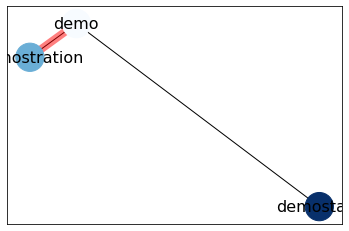

In [75]:
pos = nx.spring_layout(G1)
labels = dict((i,i) for i in G1.nodes())
nx.draw_networkx_nodes(G1, pos,node_color=range(3),node_size=800,cmap=plt.cm.Blues)
nx.draw_networkx_edges(G1, pos)
nx.draw_networkx_edges(G1, pos,edgelist=[("demo","demostration")],width=8, alpha=0.5, edge_color='r')
nx.draw_networkx_labels(G1,pos, labels, font_size=16)

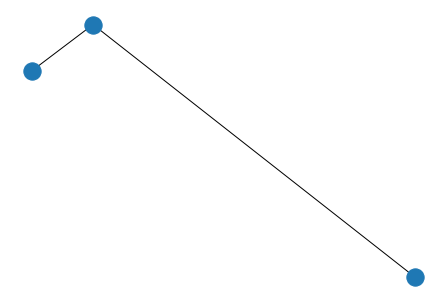

In [76]:
nx.draw(G1,pos)

In [60]:
G1.edges()

EdgeView([('demo', 'demostration'), ('demo', 'demostate')])

In [61]:
G1.nodes()

NodeView(('demo', 'demostration', 'demostate'))

In [44]:
for line in nx.generate_graphml(G1):
    print(line)

<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <key attr.name="weight" attr.type="long" for="edge" id="d0" />
  <graph edgedefault="undirected">
    <node id="demo" />
    <node id="demostration" />
    <node id="demostate" />
    <edge source="demo" target="demostration">
      <data key="d0">1</data>
    </edge>
    <edge source="demo" target="demostate">
      <data key="d0">0</data>
    </edge>
  </graph>
</graphml>


## nltk

In [3]:
df = pd.read_csv("demo.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'word', 'tags', 'chinese'], dtype='object')

In [4]:
df = df.set_index('Unnamed: 0')

In [7]:
for i in range(2150,df.shape[0]):
    word1 = df.iloc[i,0]
    #word1 = word.replace(u'\xa0', u'')
    df.iloc[i,0]= word1
    ## tags
    tags = nltk.pos_tag([word1])
    df.iloc[i,1]= tags[0][1]
    ## tran
    #Tran = Youdao2(word1).get_result()
    Tran = youdao3(word1)
    
    df.iloc[i,2] = Tran[0]
    print(i)

2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349


In [ ]:
class Youdao2(object):
    def __init__(self, msg):
        self.msg = msg
        self.url = 'http://fanyi.youdao.com/translate_o?smartresult=dict&smartresult=rule'
        self.D = "ebSeFb%=XZ%T[KZ)c(sy!"
        self.salt = self.get_salt()
        self.sign = self.get_sign()

    def get_md(self, value):
        '''md5加密'''
        m = hashlib.md5()
        # m.update(value)
        m.update(value.encode('utf-8'))
        return m.hexdigest()

    def get_salt(self):
        '''根据当前时间戳获取salt参数'''
        s = int(time.time() * 1000) + random.randint(0, 10)
        return str(s)

    def get_sign(self):
        '''使用md5函数和其他参数，得到sign参数'''
        s = "fanyideskweb" + self.msg + self.salt + self.D
        return self.get_md(s)

    def get_result(self):
        '''headers里面有一些参数是必须的，注释掉的可以不用带上'''
        headers = {
            # 'Accept': 'application/json, text/javascript, */*; q=0.01',
            # 'Accept-Encoding': 'gzip, deflate',
            # 'Accept-Language': 'zh-CN,zh;q=0.9,mt;q=0.8',
            # 'Connection': 'keep-alive',
            # 'Content-Length': '240',
            # 'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
            'Cookie': 'OUTFOX_SEARCH_USER_ID=-2022895048@10.168.8.76;',
            # 'Host': 'fanyi.youdao.com',
            # 'Origin': 'http://fanyi.youdao.com',
            'Referer': 'http://fanyi.youdao.com/',
            'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; rv:51.0) Gecko/20100101 Firefox/51.0',
            # 'X-Requested-With': 'XMLHttpRequest'
        }
        data = {
            'i': self.msg,
            'from': 'AUTO',
            'to': 'AUTO',
            'smartresult': 'dict',
            'client': 'fanyideskweb',
            'salt': self.salt,
            'sign': self.sign,
            'doctype': 'json',
            'version': '2.1',
            'keyfrom': 'fanyi.web',
            'action': 'FY_BY_CL1CKBUTTON',
            'typoResult': 'true'
        }
        html = requests.post(self.url, data=data, headers=headers).text
        print(html)
        infos = json.loads(html)
        if 'translateResult' in infos:
            try:
                result = infos['translateResult'][0][0]['tgt']
                return result
            except:
                pass

In [4]:
def youdao1(txt):
    url = 'http://fanyi.youdao.com/translate?smartresult=dict&smartresult=rule&sessionFrom=https://www.baidu.com/link'
    data = {'from': 'AUTO', 'to': 'AUTO', 'smartresult': 'dict', 'client': 'fanyideskweb', 'salt': '1500092479607',
            'sign': 'c98235a85b213d482b8e65f6b1065e26', 'doctype': 'json', 'version': '2.1', 'keyfrom': 'fanyi.web',
            'action': 'FY_BY_CL1CKBUTTON', 'typoResult': 'true', 'i': txt}

    data = urllib.parse.urlencode(data).encode('utf-8')
    wy = urllib.request.urlopen(url, data)
    html = wy.read().decode('utf-8')
    ta = json.loads(html)
    return ta['translateResult'][0][0]['tgt']

In [9]:
df.to_csv("demo.csv")

In [6]:
import urllib
import random
import hashlib
from urllib.request import urlopen
 
def youdao3(text,fromLang='EN',toLang='zh-CHS'):
    appKey = '247d2d394b316ca8'
    secretKey = '1YNhpBweiY7GbxvhG4OtY5p4MYtMxaS7'
    myurl = 'http://openapi.youdao.com/api'
    q = text
    salt = random.randint(1, 65536)
 
    sign = appKey+q+str(salt)+secretKey
    m1 = hashlib.md5()
    m1.update(sign.encode('utf-8'))
    sign = m1.hexdigest()
    myurl = myurl+'?appKey='+appKey+'&q='+urllib.parse.quote(q)+'&from='+fromLang+'&to='+toLang+'&salt='+str(salt)+'&sign='+sign
 
    try:
        httpClient = urlopen(myurl)
        response = eval(httpClient.read().decode())
        return response["translation"]
      
        
    except Exception as e:
        print (e)
    finally:
        if httpClient:
            httpClient.close()

In [3]:
df = pd.read_csv("demo.csv")
df = df.set_index('Unnamed: 0')
df

,word,tags,chinese
Unnamed: 0,,,
0,abandon,NN,放弃
1,abase,NN,自卑
2,abash,NN,使局促不安
3,abate,NN,减弱
4,abbreviate,NN,缩写
5,abdicate,NN,退位
6,aberrant,NN,憎恶的
7,abet,NN,教唆
8,abeyance,NN,中止


In [29]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [36]:
for i in range(df.shape[0]):
    word1 = df.iloc[i,0]
    #word1 = word.replace(u'\xa0', u'')
    ## tags
    tags = tag(word1)
    df.iloc[i,1]= tags
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [5]:
nlp.pos_tag([df.iloc[1,0]])

NameError: name 'nlp' is not defined

## create edge sheet

In [30]:
def tag(word):
    doc = nlp(word)
    for token in doc:
        return token.pos_

In [32]:
tag("demostration")

'NOUN'

In [35]:
df

,word,tags,chinese
Unnamed: 0,,,
0,abandon,VERB,放弃
1,abase,INTJ,自卑
2,abash,VERB,使局促不安
3,abate,NOUN,减弱
4,abbreviate,ADJ,缩写
5,abdicate,VERB,退位
6,aberrant,ADJ,憎恶的
7,abet,NOUN,教唆
8,abeyance,NOUN,中止


In [41]:
df.to_csv("demo.csv",encoding='utf_8_sig')

In [42]:
pd.value_counts(df.iloc[:,1])

NOUN     1362
ADJ       896
VERB      671
INTJ       47
ADV        46
X          22
ADP        11
PROPN      10
PUNCT       6
Name: tags, dtype: int64